In [25]:
#pip install pandas
#pip install numpy
#pip install sklearn
#python -m pip install --upgrade pip
#pip install seaborn

#SVM code by Python: linear kernal

# 参考: 
# https://github.com/adashofdata/muffin-cupcake
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

#Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

#packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

#Allows charts to appear in the notebook
%matplotlib inline

import os
import pickle


# import data
#https://bbs.csdn.net/topics/390534850
os.chdir(os.path.abspath(".")) #改变工作目录
#os.getcwd() #打印工作目录
#os.listdir() #文件列表

x_train = pd.read_csv('iris_data//x_train.csv')
x_test = pd.read_csv('iris_data//x_test.csv')
y_test=pd.read_csv('iris_data//y_test.csv')
#x_train
x_test
#y_test


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,4.6,3.4,1.4,0.3
1,4.8,3.4,1.6,0.2
2,5.2,3.5,1.5,0.2
3,5.4,3.4,1.5,0.4
4,5.5,4.2,1.4,0.2
5,5.0,3.2,1.2,0.2
6,4.4,3.0,1.3,0.2
7,4.5,2.3,1.3,0.3
8,5.0,3.5,1.6,0.6
9,4.6,3.2,1.4,0.2


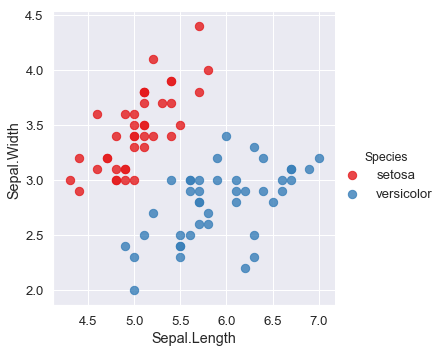

In [26]:
# Step 2: Prepare the Data
# Plot two dims
sns.lmplot('Sepal.Length', 'Sepal.Width', data=x_train, hue='Species',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});



In [27]:
# Specify inputs for the model
features = x_train[['Sepal.Length', 'Sepal.Width']].values
type_label = np.where(x_train['Species']=='setosa', 0, 1)

# Feature names
flower_features = x_train.columns.values[1:].tolist()
flower_features

['Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [49]:
# Fit the SVM model
model = svm.SVC(C=1,kernel='linear')#尝试100和1，看看下文中的分类边界的变化
#C越大，惩罚越大，则分错的点越少。 
model.fit(features, type_label)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
model.score(features, type_label) #这个score设么意思？

1.0

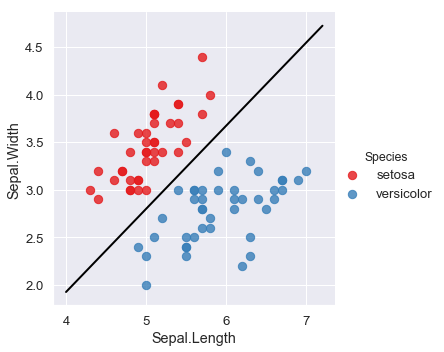

In [51]:
#Step 5: Visualize Results

# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(4,7.2)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Plot the hyperplane
sns.lmplot('Sepal.Length', 'Sepal.Width', data=x_train, hue='Species', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

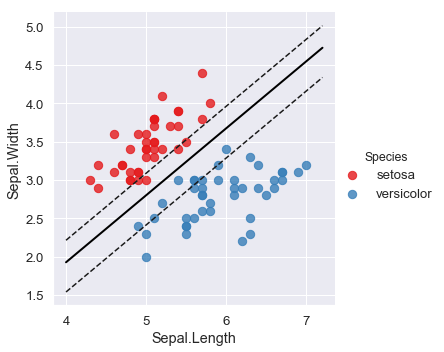

In [52]:
# Look at the margins and support vectors
sns.lmplot('Sepal.Length', 'Sepal.Width', data=x_train, hue='Species', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

In [53]:
# Create a function to guess when a para is a s or a v
def s_or_v(Sepal_L, Sepal_W):
    if(model.predict([[Sepal_L, Sepal_W]]))==0:
        print('You\'re looking at a s!')
    else:
        print('You\'re looking at a v!')

# Predict if 5.1L,3.5W  
s_or_v(5.1, 3.5)

You're looking at a s!


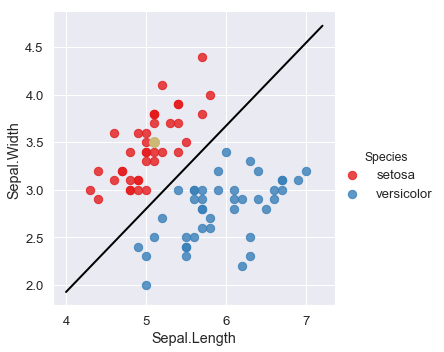

In [54]:
# Plot the point to visually see where the point lies
sns.lmplot('Sepal.Length', 'Sepal.Width', data=x_train, hue='Species', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(5.1, 3.5, 'yo', markersize='10'); #黄色的点

In [55]:
# Predict
s_or_v(5.5,3.0)

You're looking at a v!


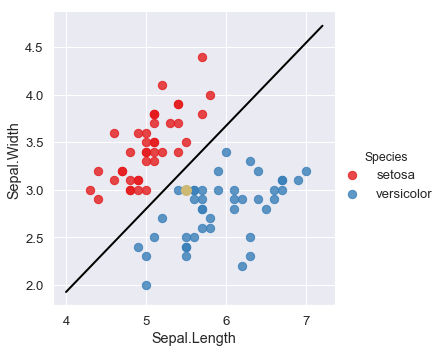

In [56]:
# Plot the point to visually see where the point lies
sns.lmplot('Sepal.Length', 'Sepal.Width', data=x_train, hue='Species', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(5.5,3.0, 'yo', markersize='10'); #黄色的点

In [61]:
#用测试集测试
x_test2=x_test[['Sepal.Length', 'Sepal.Width']].values
predicted=model.predict(x_test2)
print("预测结果: ", predicted)

#test_label=t
t=[]
for i in y_test['x']:
    if(i=='setosa'):
        t.insert(len(t),0) #在末尾插入数字0
    else:
        t.insert(len(t),1)
print("真实标签: ", np.array(t))

预测结果:  [0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1]
真实标签:  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
